# Libraries

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# Data

In [222]:
# Collected from Fangraphs.com leaderboard 2017 - 2019
df = pd.read_csv('FanGraphs Leaderboard.csv')

### A look at the data...

Who shows up as the top GB% pitcher during this time? Marcus Stroman of course...

In [224]:
df.sort_values(by='GB%', ascending = False).head()

,Season,Name,Team,W,L,SV,G,GS,IP,K/9,...,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
66,2017,Marcus Stroman,Blue Jays,13,9,0,33,33,201.0,7.34,...,0.94,0.310,78.1 %,62.1 %,17.8 %,3.09,3.90,3.58,3.4,13431
151,2017,Luis Perdomo,Padres,8,11,0,29,29,163.2,6.49,...,0.93,0.325,68.3 %,61.8 %,15.6 %,4.67,4.40,4.24,1.7,14682
131,2017,Clayton Richard,Padres,8,15,0,32,32,197.1,6.89,...,1.09,0.351,70.6 %,59.2 %,19.4 %,4.79,4.23,3.76,2.2,3551
165,2019,Dakota Hudson,Cardinals,16,7,1,33,32,174.2,7.01,...,1.13,0.274,78.1 %,56.9 %,19.8 %,3.35,4.93,4.55,1.0,19206
49,2019,Luis Castillo,Reds,15,8,0,32,32,190.2,10.67,...,1.04,0.262,76.7 %,55.2 %,17.9 %,3.40,3.70,3.48,4.1,15689


### Finding the K pitchers

When looking at the data from 2017 - 2019, let's look to see which player show up in the top 50 the most often.

In [65]:
df_K = df.sort_values(by = 'K/9', ascending = False)
df_K = df_K[0:50]
df_K['Name'].value_counts()[0:3]

Max Scherzer    3
Jacob deGrom    3
Trevor Bauer    3
Name: Name, dtype: int64

In [69]:
df_K = df_K.loc[df_K['Name'].isin(['Max Scherzer', 'Jacob deGrom', 'Trevor Bauer'])]

In [72]:
df_K

,Season,Name,Team,W,L,SV,G,GS,IP,K/9,...,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
8,2019,Max Scherzer,Nationals,11,7,0,27,27,172.1,12.69,...,0.94,0.321,78.7 %,40.8 %,11.6 %,2.92,2.45,2.88,6.5,3137
2,2018,Max Scherzer,Nationals,18,7,0,33,33,220.2,12.24,...,0.94,0.265,81.3 %,34.3 %,9.7 %,2.53,2.65,3.06,7.5,3137
9,2017,Max Scherzer,Nationals,16,6,0,31,31,200.2,12.02,...,0.99,0.245,80.7 %,36.5 %,10.8 %,2.51,2.90,3.28,6.4,3137
15,2018,Trevor Bauer,Indians,12,6,1,28,27,175.1,11.34,...,0.46,0.297,79.5 %,44.5 %,6.2 %,2.21,2.44,3.14,5.8,12703
5,2019,Jacob deGrom,Mets,11,8,0,32,32,204.0,11.25,...,0.84,0.282,81.8 %,44.4 %,11.2 %,2.43,2.67,3.11,7.0,10954
0,2018,Jacob deGrom,Mets,10,9,0,32,32,217.0,11.16,...,0.41,0.281,82.0 %,46.4 %,6.3 %,1.70,1.99,2.60,9.0,10954
72,2019,Trevor Bauer,- - -,11,13,0,34,34,213.0,10.69,...,1.44,0.287,70.4 %,37.6 %,15.3 %,4.48,4.34,4.33,3.3,12703
45,2017,Jacob deGrom,Mets,15,10,0,31,31,201.1,10.68,...,1.25,0.305,76.3 %,45.3 %,16.1 %,3.53,3.50,3.23,4.1,10954
88,2017,Trevor Bauer,Indians,17,9,0,32,31,176.1,10.00,...,1.28,0.337,76.8 %,46.4 %,16.1 %,4.19,3.88,3.60,2.8,12703


### Finding the ground ball pitchers

When looking at the data from 2017 - 2019, let's look to see which player show up in the top 50 the most often. 

In [66]:
df_ground = df.sort_values(by = 'GB%', ascending = False)
df_ground = df_ground[0:50]
df_ground['Name'].value_counts()[0:3]

Aaron Nola        3
Patrick Corbin    3
Sonny Gray        2
Name: Name, dtype: int64

In [71]:
df_ground = df_ground.loc[df_ground['Name'].isin(['Aaron Nola', 'Patrick Corbin', 'Sonny Gray'])]

### Storing data for visualizations

In [226]:
df_ground.sort_values(by = 'Season')
df_ground.sort_values(by = 'Name')

,Season,Name,Team,W,L,SV,G,GS,IP,K/9,...,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
20,2018,Aaron Nola,Phillies,17,6,0,33,33,212.1,9.49,...,0.72,0.251,82.5 %,50.6 %,10.6 %,2.37,3.01,3.21,5.4,16149
34,2017,Aaron Nola,Phillies,12,11,0,27,27,168.0,9.86,...,0.96,0.309,76.8 %,49.8 %,12.7 %,3.54,3.27,3.38,4.5,16149
64,2019,Aaron Nola,Phillies,12,7,0,34,34,202.1,10.19,...,1.20,0.295,76.8 %,49.7 %,17.4 %,3.87,4.03,3.82,3.4,16149
79,2017,Patrick Corbin,Diamondbacks,14,13,0,33,32,189.2,8.45,...,1.23,0.326,74.3 %,50.4 %,15.3 %,4.03,4.08,3.89,3.0,9323
30,2019,Patrick Corbin,Nationals,14,7,0,33,33,202.0,10.60,...,1.07,0.290,77.3 %,49.5 %,14.4 %,3.25,3.49,3.59,4.8,9323
14,2018,Patrick Corbin,Diamondbacks,11,7,0,33,33,200.0,11.07,...,0.68,0.302,74.7 %,48.5 %,11.1 %,3.15,2.47,2.61,5.9,9323
94,2017,Sonny Gray,- - -,10,12,0,27,27,162.1,8.48,...,1.05,0.269,69.6 %,52.8 %,15.1 %,3.55,3.90,3.76,2.7,12768
38,2019,Sonny Gray,Reds,11,8,0,31,31,175.1,10.52,...,0.87,0.255,79.7 %,50.8 %,13.0 %,2.87,3.42,3.65,4.4,12768


In [ ]:
Gray_FIP = [3.90, np.nan, 3.42]
Gray_ERA = [3.55, np.nan, 2.87]
Gray_K9 = [8.48, np.nan, 10.52]

Nola_FIP = [3.27, 3.01, 4.03]
Nola_ERA = [3.54, 2.37, 3.87]
Nola_K9 = [9.86, 9.49, 10.19]

Corbin_FIP = [4.08, 2.47, 3.49]
Corbin_ERA = [4.03, 3.15, 3.25]
Corbin_K9 = [8.45, 11.07, 10.60]

In [76]:
df_K.sort_values(by = 'Season')
df_K.sort_values(by = 'Name')

,Season,Name,Team,W,L,SV,G,GS,IP,K/9,...,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
5,2019,Jacob deGrom,Mets,11,8,0,32,32,204.0,11.25,...,0.84,0.282,81.8 %,44.4 %,11.2 %,2.43,2.67,3.11,7.0,10954
0,2018,Jacob deGrom,Mets,10,9,0,32,32,217.0,11.16,...,0.41,0.281,82.0 %,46.4 %,6.3 %,1.70,1.99,2.60,9.0,10954
45,2017,Jacob deGrom,Mets,15,10,0,31,31,201.1,10.68,...,1.25,0.305,76.3 %,45.3 %,16.1 %,3.53,3.50,3.23,4.1,10954
8,2019,Max Scherzer,Nationals,11,7,0,27,27,172.1,12.69,...,0.94,0.321,78.7 %,40.8 %,11.6 %,2.92,2.45,2.88,6.5,3137
2,2018,Max Scherzer,Nationals,18,7,0,33,33,220.2,12.24,...,0.94,0.265,81.3 %,34.3 %,9.7 %,2.53,2.65,3.06,7.5,3137
9,2017,Max Scherzer,Nationals,16,6,0,31,31,200.2,12.02,...,0.99,0.245,80.7 %,36.5 %,10.8 %,2.51,2.90,3.28,6.4,3137
15,2018,Trevor Bauer,Indians,12,6,1,28,27,175.1,11.34,...,0.46,0.297,79.5 %,44.5 %,6.2 %,2.21,2.44,3.14,5.8,12703
72,2019,Trevor Bauer,- - -,11,13,0,34,34,213.0,10.69,...,1.44,0.287,70.4 %,37.6 %,15.3 %,4.48,4.34,4.33,3.3,12703
88,2017,Trevor Bauer,Indians,17,9,0,32,31,176.1,10.00,...,1.28,0.337,76.8 %,46.4 %,16.1 %,4.19,3.88,3.60,2.8,12703


In [121]:
Scherzer_FIP = [2.90, 2.65, 2.45]
Scherzer_ERA = [2.51, 2.53, 2.92]
Scherzer_K9 = [12.02, 12.24, 12.69]

deGrom_FIP = [3.50, 1.99, 2.67]
deGrom_ERA = [3.53, 1.70, 2.43]
deGrom_K9 = [10.68, 11.16, 11.25]

Bauer_FIP = [3.88, 4.34, 2.44] 
Bauer_ERA = [4.19, 4.48, 2.21]
Bauer_K9 = [10.00, 10.69, 11.34]

### Visualization to compare sets of pitchers and their strikeouts per 9 innings

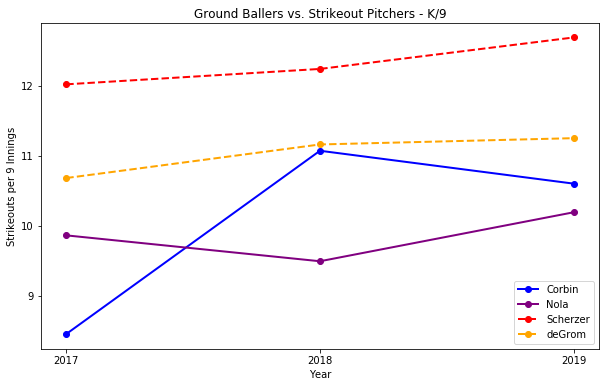

In [126]:
# multiple line plot
plt.figure(figsize = (10,6))
x = ['2017', '2018', '2019']
plt.plot(x, Corbin_K9, marker='o', color='b', markersize=6, linewidth=2, label = 'Corbin')
plt.plot(x, Nola_K9, marker='o', color='purple', markersize=6 , linewidth=2, label = 'Nola')
plt.plot(x, Scherzer_K9, marker='o', color='r', markersize=6, linewidth=2, linestyle='dashed', label = 'Scherzer')
plt.plot(x, deGrom_K9, marker='o', color='orange', markersize=6 , linewidth=2, linestyle='dashed', label = 'deGrom')
plt.title('Ground Ballers vs. Strikeout Pitchers - K/9')
plt.ylabel('Strikeouts per 9 Innings')
plt.xlabel('Year')
plt.legend()


### Visualization to compare sets of pitchers and their Field Independent Pitching

In [99]:
def splitSerToArr(ser):
    return [ser.index, ser.as_matrix()]

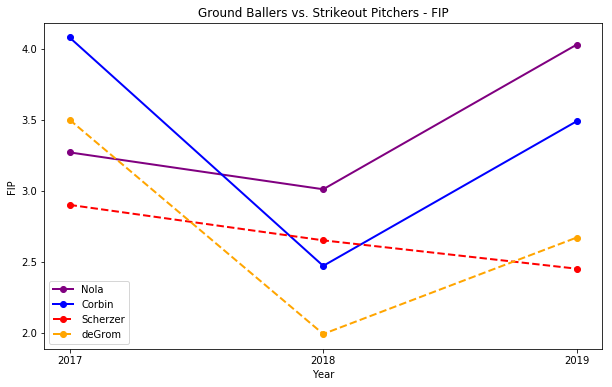

In [125]:

# multiple line plot
plt.figure(figsize = (10,6))
x = ['2017', '2018', '2019']
plt.plot(x, Nola_FIP, marker='o', color='purple', markersize=6, linewidth=2, label = 'Nola')
plt.plot(x, Corbin_FIP, marker='o', color='b', markersize=6, linewidth=2, label='Corbin')
plt.plot(x, Scherzer_FIP, marker='o', color='r', markersize=6, linewidth=2, linestyle='dashed', label = 'Scherzer')
plt.plot(x, deGrom_FIP, marker='o', color='orange', markersize=6 , linewidth=2, linestyle='dashed', label = 'deGrom')
plt.ylabel('FIP')
plt.xlabel('Year')
plt.title('Ground Ballers vs. Strikeout Pitchers - FIP')
plt.legend()

### Visualization to compare sets of pitchers and their ERA


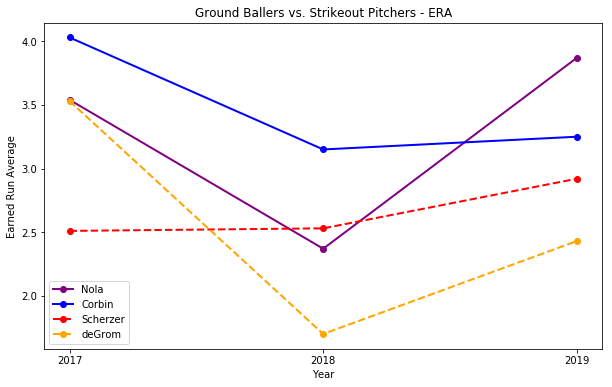

In [127]:
# multiple line plot
plt.figure(figsize = (10,6))
x = ['2017', '2018', '2019']
plt.plot(x, Nola_ERA, marker='o', color='purple', markersize=6, linewidth=2, label='Nola')
plt.plot(x, Corbin_ERA, marker='o', color='b', markersize=6, linewidth=2, label='Corbin')
plt.plot(x, Scherzer_ERA, marker='o', color='r', markersize=6, linewidth=2, linestyle='dashed', label='Scherzer')
plt.plot(x, deGrom_ERA, marker='o', color='orange', markersize=6 , linewidth=2, linestyle='dashed', label='deGrom')
plt.title('Ground Ballers vs. Strikeout Pitchers - ERA')
plt.ylabel('Earned Run Average')
plt.xlabel('Year')
plt.legend()

### Now, let's make comparisons between these 4 pitchers and their pitch types thrown

In [227]:
# Load data...again, from Fangraphs.com
df2 = pd.read_csv('pitchtypes.csv')
# Cut out only who and what we need
df2 = df2.loc[df2['Name'].isin(['Max Scherzer', 'Jacob deGrom', 'Aaron Nola', 'Patrick Corbin'])]
df2 = df2[['Name', 'Team', 'IP', 'FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']]
# Formating
df2 = df2.fillna(0)
df2[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']] = df2[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']].replace({'%':''}, regex=True)
df2[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']] = df2[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']].astype(float)
# Take a look
df2

,Name,Team,IP,FA%,FC%,SI%,CH%,SL%,CU%
25,Max Scherzer,Nationals,593.2,49.1,7.5,0.0,14.8,20.2,8.4
38,Jacob deGrom,Mets,622.1,43.3,0.0,9.0,14.6,26.3,6.8
65,Aaron Nola,Phillies,582.2,32.8,0.0,16.6,18.2,0.0,32.4
83,Patrick Corbin,- - -,591.2,22.9,0.0,29.0,5.2,38.8,4.1


### Let's visulize and compare pitches among these 4

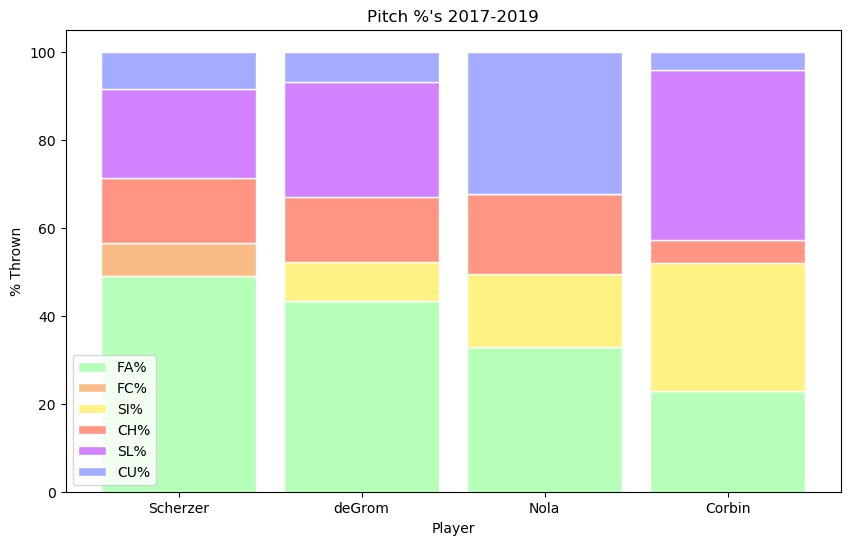

In [231]:
plt.figure(figsize = (10,6))

# Data
r = ['FA%','FC%','SI%','CH%','SL%', 'CU%']
 
# From raw value to percentage
totals = [i+j+k+l+m+o for i,j,k,l,m,o in zip(df2['FA%'], df2['FC%'], df2['SI%'], df2['CH%'], df2['SL%'], df2['CU%'])]
 
# plot
barWidth = 0.85
names = ('Scherzer','deGrom','Nola','Corbin')
# Create green bars
plt.bar(names, df2['FA%'], color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange bars
plt.bar(names, df2['FC%'], bottom=df2['FA%'], color='#f9bc86', edgecolor='white', width=barWidth)
# Create yellow bars
plt.bar(names, df2['SI%'], bottom=[i+j for i,j in zip(df2['FA%'], df2['FC%'])], color='#fff282', edgecolor='white', width=barWidth)
# Create red bars
plt.bar(names, df2['CH%'], bottom=[i+j+k for i,j,k in zip(df2['FA%'], df2['FC%'], df2['SI%'])], color='#FF9582', edgecolor='white', width=barWidth)
# Create violet bars
plt.bar(names, df2['SL%'], bottom=[i+j+k+l for i,j,k,l in zip(df2['FA%'], df2['FC%'], df2['SI%'], df2['CH%'])], color='#D282FF', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(names, df2['CU%'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df2['FA%'], df2['FC%'], df2['SI%'], df2['CH%'], df2['SL%'])], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(names)
plt.legend(r)
plt.xlabel("Player")
plt.ylabel("% Thrown")
plt.title("Pitch %'s 2017-2019")
 
# Show graphic
plt.show()


### Finally, how do these pitchers compare to those who really NEED to put the ball on the ground most often, Colorado Rockies pitchers

In [229]:
# Load data, from...you already know...
df3 = pd.read_csv('rockies19.csv')
# Cut out only what we need
df3 = df3[['Name', 'IP', 'FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']]
# Format
df3 = df3.fillna(0)
df3[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']] = df3[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']].replace({'%':''}, regex=True)
df3[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']] = df3[['FA%', 'FC%', 'SI%', 'CH%', 'SL%', 'CU%']].astype(float)

In [232]:
df3

,Name,IP,FA%,FC%,SI%,CH%,SL%,CU%
0,Antonio Senzatela,124.2,63.7,0.0,0.0,6.3,19.8,10.2
1,Jon Gray,150.0,52.3,0.0,0.4,2.7,33.5,11.1
2,Kyle Freeland,104.1,41.4,31.3,10.6,11.0,5.6,0.1
3,German Marquez,174.0,40.6,0.0,11.5,3.3,22.4,22.2


### Visualize the Rockies and their pitch types

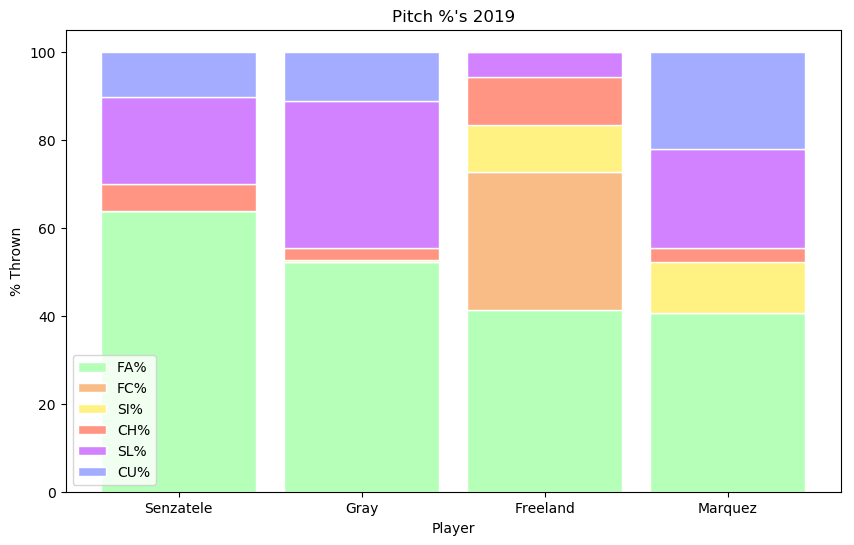

In [230]:
plt.figure(figsize = (10,6))

# Data
r = ['FA%','FC%','SI%','CH%','SL%', 'CU%']
 
# From raw value to percentage
[i+j+k+l+m+o for i,j,k,l,m,o in zip(df3['FA%'], df3['FC%'], df3['SI%'], df3['CH%'], df3['SL%'], df3['CU%'])]

# plot
barWidth = 0.85
names = ('Senzatele','Gray','Freeland','Marquez')
# Create green bars
plt.bar(names, df3['FA%'], color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange bars
plt.bar(names, df3['FC%'], bottom=df3['FA%'], color='#f9bc86', edgecolor='white', width=barWidth)
# Create yellow bars
plt.bar(names, df3['SI%'], bottom=[i+j for i,j in zip(df3['FA%'], df3['FC%'])], color='#fff282', edgecolor='white', width=barWidth)
# Create red bars
plt.bar(names, df3['CH%'], bottom=[i+j+k for i,j,k in zip(df3['FA%'], df3['FC%'], df3['SI%'])], color='#FF9582', edgecolor='white', width=barWidth)
# Create violet bars
plt.bar(names, df3['SL%'], bottom=[i+j+k+l for i,j,k,l in zip(df3['FA%'], df3['FC%'], df3['SI%'], df3['CH%'])], color='#D282FF', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(names, df3['CU%'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df3['FA%'], df3['FC%'], df3['SI%'], df3['CH%'], df3['SL%'])], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(names)
plt.legend(r)
plt.xlabel("Player")
plt.ylabel("% Thrown")
plt.title("Pitch %'s 2019")
 
# Show graphic
plt.show()

In [239]:
df_avg = pd.read_csv('League.csv')
# Format
df_avg = df_avg.fillna(0)
df_avg[['GB%']] = df_avg[['GB%']].replace({'%':''}, regex=True)
df_avg['GB%'] = df_avg['GB%'].astype(float)
np.mean(df_avg['GB%'])

43.33653846153846

### Lastly, let's compare all these pitchers and their GB% to see what stands out

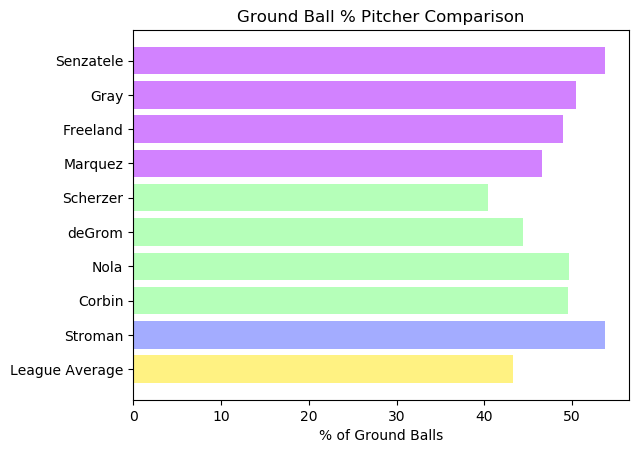

In [240]:
#Senzatele, Gray, Freeland, Marquez
#53.8, 50.4, 49.0, 46.6

#Scherzer, deGrom, Nola, Corbin
#40.38, 44.4, 49.7, 49.5

#Stroman
#53.7

plt.rcdefaults()
fig, ax = plt.subplots()
colors = ['#D282FF','#D282FF','#D282FF','#D282FF','#b5ffb9','#b5ffb9','#b5ffb9','#b5ffb9', '#a3acff', '#fff282']
# Example data
people = ('Senzatele', 'Gray', 'Freeland', 'Marquez', 'Scherzer', 'deGrom', 'Nola', 'Corbin', 'Stroman', 'League Average')
y_pos = np.arange(len(people))
GB_percent = [53.8, 50.4, 49.0, 46.6, 40.38, 44.4, 49.7, 49.5, 53.7, 43.3]

ax.barh(y_pos, GB_percent, align='center',
        color=colors, ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% of Ground Balls')
ax.set_title('Ground Ball % Pitcher Comparison')

plt.show()